In [18]:
from runner import Runner
from model_lgb import ModelLGB
import matplotlib.pyplot as plt
import pandas as pd
from dataset import Dataset

In [20]:
Dataset.get_all_feature_names()

Index(['人口', '傷病程度：その他', '傷病程度：中等症', '傷病程度：死亡', '傷病程度：軽症', '傷病程度：重症',
       '天気概況(夜)', '天気概況(昼)', '平均気温', '平均湿度', '平均現地気圧', '平均蒸気圧', '平均雲量', '平均風速',
       '年齢区分：不明', '年齢区分：乳幼児', '年齢区分：少年', '年齢区分：成人', '年齢区分：新生児', '年齢区分：高齢者',
       'target', 'date', '日照時間', '最低気温', '最高気温', '発生場所：その他', '発生場所：仕事場①',
       '発生場所：仕事場②', '発生場所：住居', '発生場所：公衆(屋内)', '発生場所：公衆(屋外)', '発生場所：教育機関',
       '発生場所：道路', '県名', '降水量', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [2]:
plt.rcParams["font.size"] = 18

In [23]:
prms = {
    # lightGBM
    'num_round': 10000,
    'early_stopping_rounds': 10,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metrics': 'huber',
    'num_leaves': 30,
    'learning_rate': 0.3,
    'verbose': 0,

    # target
    'target': 'target',

    # 街・年
    'cities': ['tokyo'],
    #'train_years': [i for i in range(2008, 2017)],
    'train_years': [i for i in range(2010, 2015)],
    'valid_years': [2015, 2016],
    'test_years': [2017, 2018],

    # cv
    'cv': 'manual',
}

features = [
    'target','最高気温', '平均気温', '最低気温', '平均湿度',
    '平均現地気圧', '平均蒸気圧', '平均雲量', '平均風速', '日照時間', '降水量',
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
]

9.195981070131344 16.33545415088745


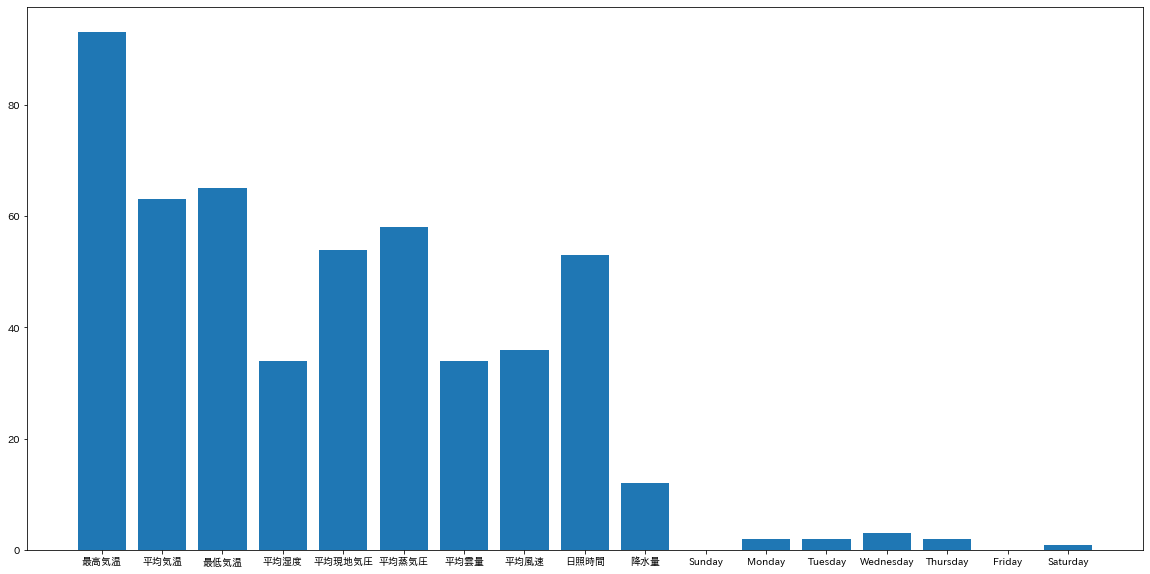

In [24]:
%matplotlib inline
runner = Runner(run_name='test', model_cls=ModelLGB, features=features, prms=prms)
valid_score, test_score = runner.run()
print(valid_score, test_score)
runner.feature_importance()